In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
import warnings
warnings.simplefilter(action="ignore")
import datetime as dt
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
data = pd.read_excel("France.xlsx")

In [3]:
data.drop("Unnamed: 0", axis=1, inplace=True)

In [4]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,Day of Week
0,489439,22065,CHRISTMAS PUDDING TRINKET POT,12,2009-12-01 09:28:00,1.45000,12682,France,17.40000,Tuesday
1,489439,22138,BAKING SET 9 PIECE RETROSPOT,9,2009-12-01 09:28:00,4.95000,12682,France,44.55000,Tuesday
2,489439,22139,RETRO SPOT TEA SET CERAMIC 11 PC,9,2009-12-01 09:28:00,4.95000,12682,France,44.55000,Tuesday
3,489439,22352,LUNCHBOX WITH CUTLERY RETROSPOT,12,2009-12-01 09:28:00,2.55000,12682,France,30.60000,Tuesday
4,489439,85014A,BLACK/BLUE DOTS RUFFLED UMBRELLA,3,2009-12-01 09:28:00,5.95000,12682,France,17.85000,Tuesday


In [5]:
data.shape

(11383, 10)

In [6]:
data.groupby("Invoice").agg({"Description" : "count"}).sort_values("Description", ascending=False).head()

,Description
Invoice,
570672,230
578541,104
532306,97
537065,96
497360,89


In [7]:
data.groupby("Invoice").agg({"Description" : "count"}).describe().T

,count,mean,std,min,25%,50%,75%,max
Description,565.00000,20.14690,18.58805,1.00000,9.00000,16.00000,25.00000,230.00000


array([[<AxesSubplot:title={'center':'Description'}>]], dtype=object)

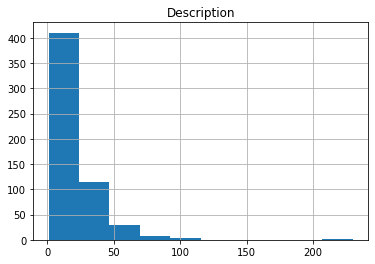

In [8]:
data.groupby("Invoice").agg({"Description" : "count"}).hist()

In [9]:
products = {}
for i in data["Invoice"]:
    products[i] = list(data[data["Invoice"] == i ]["Description"])

In [10]:
normal_baskets = {}
large_baskets = {}
for i,j in products.items():
    if len(j) < 50:
        normal_baskets[i] = j
    else:
        large_baskets[i] = j

In [11]:
max_len = 0 
for i in normal_baskets.values():
    if len(i) > max_len:
        max_len = len(i)

In [12]:
max_len 

48

In [13]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
oht_ary = te.fit(normal_baskets.values()).transform(normal_baskets.values(), sparse=True)
sparse_df = pd.DataFrame.sparse.from_spmatrix(oht_ary, columns=te.columns_)
sparse_df.head()

50'S CHRISTMAS GIFT BAG LARGE   DOLLY GIRL BEAKER   FLAMINGO LIGHTS  \
0                               0                   0                 0   
1                               0                   0                 0   
2                               0                   0                 0   
3                               0                   0                 0   
4                               0                   0                 0   

    I LOVE LONDON MINI BACKPACK   RED/WHITE DOT MINI CASES  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   

    SET 2 TEA TOWELS I LOVE LONDON    TRELLIS COAT RACK  \
0                                 0                   0   
1                                 0                   0   
2                                 0                   0   
3                                 0                   0   
4                                 0                   0   

    VINTAGE DESIGN GIFT TAGS  10 COLOUR SPACEBOY PEN  \
0                          1                       0   
1                          0                       0   
2                          0                       0   
3                          0                       0   
4                          0                       0   

   12 COLOURED PARTY BALLOONS  12 MESSAGE CARDS WITH ENVELOPES  \
0                           0                                0   
1                           0                                0   
2                           0                                0   
3                           0                                0   
4                           0                                0   

   12 PENCIL SMALL TUBE WOODLAND  12 PENCILS SMALL TUBE POSY  \
0                              0                           0   
1                              0                           0   
2                              0                           0   
3                              0                           0   
4                              0                           0   

   12 PENCILS SMALL TUBE RED RETROSPOT  12 PENCILS SMALL TUBE RED SPOTTY  \
0                                    0                                 0   
1                                    0                                 0   
2                                    0                                 0   
3                                    0                                 0   
4                                    0                                 0   

   12 PENCILS SMALL TUBE SKULL  12 PENCILS TALL TUBE RED RETROSPOT  \
0                            0                                   0   
1                            0                                   0   
2                            0                                   0   
3                            0                                   0   
4                            0                                   0   

   12 PENCILS TALL TUBE RED SPOTTY  12 PENCILS TALL TUBE SKULLS  \
0                                0                            0   
1                                0                            0   
2                                1                            0   
3                                0                            0   
4                                0                            0   

   12 PENCILS TALL TUBE WOODLAND  18PC WOODEN CUTLERY SET DISPOSABLE  \
0                              0                                   0   
1                              0                                   0   
2                              1                                   0   
3                              0                                   0   
4                              0                                 

In [14]:
sparse_df.shape

(528, 1679)

In [15]:
freq_items = apriori(sparse_df, min_support=0.065, use_colnames=True, verbose=1)
freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))
freq_items.sort_values("support", ascending=False)

Processing 60 combinations | Sampling itemset size 3


,support,itemsets,length
17,0.20076,(RED TOADSTOOL LED NIGHT LIGHT),1
20,0.17045,(ROUND SNACK BOXES SET OF4 WOODLAND ),1
10,0.14773,(LUNCH BOX WITH CUTLERY RETROSPOT ),1
12,0.14773,(PLASTERS IN TIN CIRCUS PARADE ),1
14,0.14205,(PLASTERS IN TIN WOODLAND ANIMALS),1
25,0.12689,(STRAWBERRY LUNCH BOX WITH CUTLERY),1
19,0.12311,(ROUND SNACK BOXES SET OF 4 FRUITS ),1
24,0.12121,(SPACEBOY LUNCH BOX ),1
22,0.11553,(SET/6 RED SPOTTY PAPER CUPS),1
8,0.11174,(LUNCH BAG WOODLAND),1


In [16]:
freq_items.shape

(34, 3)

In [18]:
final_df = association_rules(freq_items, metric = "confidence", min_threshold = 0.3)
final_df.sort_values(by="lift", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.11553,0.10606,0.09280,0.80328,7.57377,0.08055,4.54419
11,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.10606,0.11553,0.09280,0.87500,7.57377,0.08055,7.07576
6,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.10227,0.14205,0.07008,0.68519,4.82370,0.05555,2.72527
7,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN SPACEBOY),0.14205,0.10227,0.07008,0.49333,4.82370,0.05555,1.77183
2,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN CIRCUS PARADE ),0.10227,0.14773,0.06818,0.66667,4.51282,0.05307,2.55682
3,(PLASTERS IN TIN CIRCUS PARADE ),(PLASTERS IN TIN SPACEBOY),0.14773,0.10227,0.06818,0.46154,4.51282,0.05307,1.66721
4,(PLASTERS IN TIN CIRCUS PARADE ),(PLASTERS IN TIN WOODLAND ANIMALS),0.14773,0.14205,0.08712,0.58974,4.15179,0.06614,2.09126
5,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN CIRCUS PARADE ),0.14205,0.14773,0.08712,0.61333,4.15179,0.06614,2.20415
0,(LUNCH BOX WITH CUTLERY RETROSPOT ),(STRAWBERRY LUNCH BOX WITH CUTLERY),0.14773,0.12689,0.07765,0.52564,4.14237,0.05891,1.84060
1,(STRAWBERRY LUNCH BOX WITH CUTLERY),(LUNCH BOX WITH CUTLERY RETROSPOT ),0.12689,0.14773,0.07765,0.61194,4.14237,0.05891,2.19624
